In [77]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

In [96]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


documents=pd.read_csv('JobPhysio_Cleaned.csv')

documents['documents'] = documents['job_desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
documents_df=pd.DataFrame(documents,columns=['documents'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icyro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
documents_df

,documents
0,specialisation geriatrics setting senior daycare rehab centre looking senior/ot senior/pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews.
1,institute appropriate effective client therapy treatment.
2,participate multidisciplinary case discussions care team.
3,contribute formulation follow-up clients individual care plan [icp] ensure holistic health care coverage.
4,plan conduct group therapy programme activities day care clients.
5,review revise programme schedule necessary enhance quality therapy program.
6,take charge proper documentation therapy records.
7,interact foster close warm relationships clients families caregivers exhibit sincerity care respect clients.
8,requirements bachelor degree / diploma occupational therapy qualified registered ahpc [allied health professions council].
9,minimum - years working experience hospital eldercare institution good communication interpersonal skills interested candidates please send resume wanyee@dhc.com.sg last drawn/expected salary reasons leaving employment.


In [98]:
stop_words_l=stopwords.words('english')
documents_df['documents_cleaned']=documents_df.documents.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split()))

In [99]:
documents_df=pd.DataFrame(documents_df,columns=['documents_cleaned'])

In [100]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', 0)

In [101]:
documents_df

,documents_cleaned
0,specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews
1,institute appropriate effective client therapy treatment
2,participate multidisciplinary case discussions care team
3,contribute formulation follow up clients individual care plan icp ensure holistic health care coverage
4,plan conduct group therapy programme activities day care clients
5,review revise programme schedule necessary enhance quality therapy program
6,take charge proper documentation therapy records
7,interact foster close warm relationships clients families caregivers exhibit sincerity care respect clients
8,requirements bachelor degree diploma occupational therapy qualified registered ahpc allied health professions council
9,minimum years working experience hospital eldercare institution good communication interpersonal skills interested candidates please send resume wanyee dhc com sg last drawn expected salary reasons leaving employment


### Corpus Dataframe

In [102]:
documents_df['documents_cleaned']

0      specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews                                                                                                                                                                                                                                                                                                               
1      institute appropriate effective client therapy treatment                                                                                                                                                                                                                                                                                                                                                                                                    

In [107]:
tokensized_jd = documents_df.loc[0, "documents_cleaned"]
print(tokensized_jd)

specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews 


#### Tf-idf vectors

Compute tf-idf weights and the cosine similarity score between two vectors.

Term frequency-inverse document frequency
Proportional to term frequency
Inverse function of the number of documents in which it occurs

In [108]:
tfidfvectoriser=TfidfVectorizer(max_features=64)
tfidfvectoriser.fit(documents_df.documents_cleaned)
tfidf_vectors=tfidfvectoriser.transform(documents_df.documents_cleaned)

In [109]:
parse_tweets=[]

for i in range(len(documents_df['documents_cleaned'])) :

        patt=r'https?://\S+'
        rt=re.compile(patt)
        parse_tweets.append(rt.sub('',documents_df['documents_cleaned'][i]))

parse_tweets[:2]    

['specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews ',
 'institute appropriate effective client therapy treatment ']

In [110]:
# Count Word Freq. 
from sklearn.feature_extraction.text import CountVectorizer

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(parse_tweets)

# OPTIONAL: Convert Sparse Matrix to DF
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names()) 

df.head(9)

c:\Users\icyro\anaconda3\envs\cuda_3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abilities,ability,accountabilities,accredited,accurate,activate,activities,ad,addition,additional,address,addresshealthcare,administer,administration,admission,advanced,advertised,ahpc,aides,alleviate,allied,also,apologise,applicable,applicant,apply,applying,appropriate,appropriately,assess,assessment,assessments,assign,assigned,assist,assistive,associate,associates,attitude,attn,...,superior,supervise,supervisor,support,take,teaching,team,technique,technology,thank,the,therapeutic,therapist,therapy,thorough,time,timely,tolerance,train,training,traits,treat,treatment,treatments,understand,up,updated,us,use,valid,various,via,volunteers,wanyee,warm,wish,work,working,workplace,years
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
# Actually doing the cosine similarity comparisons now:

from sklearn.metrics.pairwise import cosine_similarity

dj=pd.DataFrame(cosine_similarity(df, dense_output=True))

dj.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106
0,1.000000,0.065372,0.000000,0.080064,0.213504,0.053376,0.065372,0.082690,0.133235,0.0,0.0,0.000000,0.0,0.0,0.0,0.053376,0.000000,0.0,0.050637,0.045751,0.000000,0.018490,0.0,0.0,0.0,0.040032,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.035806,0.0,0.000000,0.000000,0.069886,0.0,0.04828,...,0.0,0.053376,0.000000,0.0,0.053376,0.000000,0.0,0.053376,0.000000,0.0,0.0,0.050637,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.106752,0.0,0.0,0.490653,0.392232,0.065372,0.000000,0.082690,0.213504,0.065372,0.064051,0.0,0.035806,0.000000,0.0,0.0,0.0,0.000000,0.044412,0.000000,0.0,0.000000
1,0.065372,1.000000,0.000000,0.000000,0.136083,0.136083,0.166667,0.000000,0.113228,0.0,0.0,0.048795,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.058321,0.000000,0.047140,0.0,0.0,0.0,0.000000,0.113228,0.073324,0.0,0.089087,0.408248,0.000000,0.102062,0.273861,0.0,0.235702,0.154303,0.000000,0.0,0.00000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.288675,0.0,0.0,0.258199,0.144338,0.000000,0.000000,0.000000,0.0,0.0,0.136083,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.136083,0.166667,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.154303,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,1.000000,0.204124,0.136083,0.000000,0.000000,0.105409,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.116642,0.060858,0.000000,0.0,0.0,0.0,0.204124,0.000000,0.000000,0.0,0.089087,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.182574,0.0,0.0,0.000000,0.0,0.0,0.096225,0.000000,0.000000,1.000000,0.210819,0.136083,0.166667,0.081650,0.0,0.000000,0.166667,0.0,0.0,0.0,0.000000,0.113228,0.117851,0.0,0.066227
3,0.080064,0.000000,0.204124,1.000000,0.333333,0.000000,0.000000,0.258199,0.069338,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.083333,0.0,0.079057,0.000000,0.037268,0.028868,0.0,0.0,0.0,0.250000,0.000000,0.000000,0.0,0.109109,0.062500,0.000000,0.000000,0.055902,0.0,0.000000,0.094491,0.054554,0.0,0.00000,...,0.0,0.000000,0.083333,0.0,0.000000,0.083333,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.102062,0.083333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.176777,0.102062,0.000000,0.204124,0.968246,0.333333,0.204124,0.150000,0.0,0.000000,0.204124,0.0,0.0,0.0,0.000000,0.208013,0.144338,0.0,0.040555
4,0.213504,0.136083,0.136083,0.333333,1.000000,0.222222,0.136083,0.258199,0.092450,0.0,0.0,0.039841,0.0,0.0,0.0,0.000000,0.000000,0.0,0.105409,0.190476,0.000000,0.076980,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.0,0.072739,0.000000,0.100504,0.000000,0.074536,0.0,0.000000,0.000000,0.000000,0.0,0.00000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.117851,0.0,0.0,0.210819,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.157135,0.272166,0.136083,0.136083,0.344265,1.000000,0.272166,0.133333,0.0,0.000000,0.136083,0.0,0.0,0.0,0.000000,0.184900,0.096225,0.0,0.000000


In [112]:
t=[]

# Part 01:
for j,k in enumerate(dj.values):
    for n in range(len(k)):
        t.append([j,n,k[n]])

# Part 02:
qq=[]
for i in range(len(t)):
    if t[i][0]==t[i][1]:
        qq.append([t[i][0],t[i][1],0])
    else:
        qq.append(t[i])
qq[:5]

[[0, 0, 0],
 [0, 1, 0.06537204504606135],
 [0, 2, 0.0],
 [0, 3, 0.08006407690254357],
 [0, 4, 0.2135042050734495]]

In [113]:
from collections import defaultdict
u=defaultdict(list)

# Part 01:

for i in range(len(qq)):
    u[qq[i][0]].append(qq[i][2])
    
updated_df=pd.DataFrame(u)

# updated_df.max(axis=1)
# max(updated_df[0])
# np.argmax(updated_df[3])
# updated_df[3]

# Part 02:

position_maxVal=[]
for i in range(len(updated_df)):
    position_maxVal.append(np.argmax(updated_df[i]))

In [124]:
# tweets w/o html in them
p_twt=pd.DataFrame(parse_tweets,columns=['Parsed Tweets'])

# put everything together
cos_sim_df=pd.concat([p_twt,similar_tweets_,similarity_value_],axis=1)


cos_sim_df.sort_values(by=['Similarity Value'],ascending=False)

#cos_sim_df

,Parsed Tweets,Similar Tweet,Similarity Value
81,ensure referring sources updated appropriately patient s progress timely manner,name,1.0000
98,possess passionate disposition interact care seniors,fully registered therapist singapore allied health professional council interested candidates invited apply online comprehensive resume via apply button below,1.0000
96,job requirements qualifications bachelor degree diploma physiotherapy,good organisation ability ability form networks strong linkages stakeholders,1.0000
95,understand dementia issues know manage clients display behavioral problems associate onset dementia take care duties centre manager may assign time time,requirements qualities personality traits interests skills required job demonstrates good communications people engagement skills preferably use local languages dialects order liaise local dialects language speaking associates,1.0000
94,take care proper documentation therapy records,duty assigned rehab manager general manager skills knowledge educational requirements diploma degree physiotherapy recognised singapore allied health professional council,1.0000
93,plan conduct group therapy programme activities day care clients,ensure proper documentation made treatment rendered patients,1.0000
92,contribute formulation follow up clients individual care plan ensure holistic health care coverage,administration maintain database records patients provide evidence based treatment accurate appropriate documentation,1.0000
91,participate multidisciplinary case discussions care team,provide training caregivers preparation patients discharge back home environment,1.0000
90,institute appropriate effective client therapy treatment,training development guide supervise train physiotherapy students therapy aides caregivers volunteers performance duties implementation programmes ensure safe effective treatment patients,1.0000
89,conduct assessments clients admission periodic reviews,maintain good communication liaise various disciplines involved rehabilitation process refer patients respective professionals consultation appropriate intervention,1.0000


In [21]:
print(cos_sim_df['Parsed Tweets'][1])
print('-----------------')
print(cos_sim_df['Similar Tweet'][2])
print('-----------------')
print('Similarity Value:',cos_sim_df['Similarity Value'][2])    

institute appropriate effective client therapy treatment 
-----------------
participate multidisciplinary case discussions care team 
-----------------
Similarity Value: 1.0


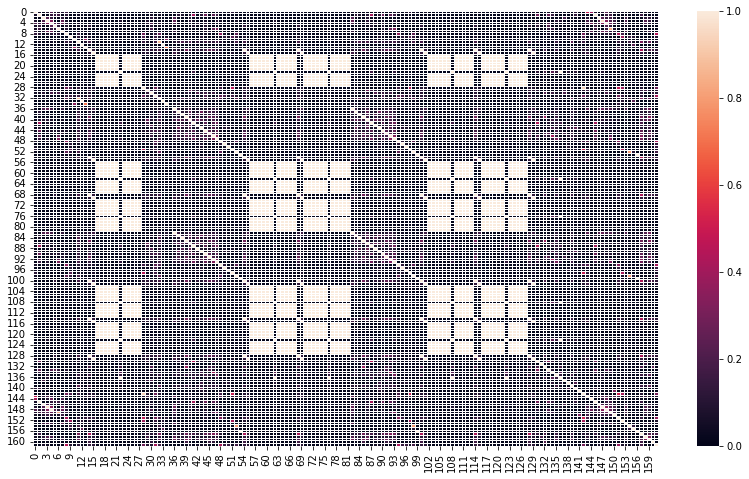

In [169]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,8))
# uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(dj, linewidth=0.5)
plt.show()

In [117]:
tfidfvectoriser=TfidfVectorizer(max_features=64)
tfidfvectoriser.fit(documents_df.documents_cleaned)
tfidf_vectors=tfidfvectoriser.transform(documents_df.documents_cleaned)

In [237]:
documents_df.documents_cleaned

0      specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews                                 
1      institute appropriate effective client therapy treatment                                                                                                                                                                                                                       
2      participate multidisciplinary case discussions care team                                                                                                                                                                                                                       
3      contribute formulation follow up clients individual care plan  icp  ensure holistic health care coverage                                                    

In [238]:
tfidf_vectors.shape

(162, 64)

In [239]:
tfidf_vectors=tfidf_vectors.toarray()
print (tfidf_vectors[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.33361394
 0.35513106 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.33361394 0.
 0.         0.         0.         0.         0.         0.
 0.68739665 0.         0.         0.         0.         0.
 0.30212996 0.         0.         0.         0.29578497 0.
 0.         0.         0.         0.        ]


##### Every document has been converted into a 64 dimensional vector. As we set the max_features=64

### Pairwise similarity

##### Pairwise cosine similarity would just be the dot product of the vectors becasue tf-idf vectors from sklearn are already normalized and L2 norm of these vectors is 1. So denominator of cosine similiarity formula is 1 in this case.

In [122]:
pairwise_similarities=np.dot(tfidf_vectors,tfidf_vectors.T)
pairwise_differences=euclidean_distances(tfidf_vectors)

In [123]:
print (tfidf_vectors[0])
print (pairwise_similarities.shape)
print (pairwise_similarities[0][:])

  (0, 57)	0.29128246170704375
  (0, 53)	0.2983760628774667
  (0, 47)	0.6896975595642596
  (0, 38)	0.33357460973933056
  (0, 13)	0.35763037959496385
  (0, 12)	0.33357460973933056
(107, 107)
  (0, 95)	0.20261345595377397
  (0, 7)	0.3096574753366316
  (0, 89)	0.4890516421319783
  (0, 21)	0.07108678454082086
  (0, 103)	0.19028363460264525
  (0, 92)	0.26845794935234035
  (0, 18)	0.2134957722131681
  (0, 3)	0.26845794935234035
  (0, 85)	0.4256641839167345
  (0, 61)	0.21712147975689045
  (0, 37)	0.21712147975689045
  (0, 88)	0.593836019559465
  (0, 74)	0.11422443597070328
  (0, 71)	0.11422443597070328
  (0, 68)	0.11422443597070328
  (0, 64)	0.24132618958417515
  (0, 49)	0.11208163436593416
  (0, 47)	0.11422443597070328
  (0, 44)	0.11422443597070328
  (0, 40)	0.24132618958417515
  (0, 25)	0.11208163436593416
  (0, 15)	0.11422443597070328
  (0, 94)	0.16403796682358987
  (0, 93)	0.4979071470058082
  (0, 90)	0.14112066056561665
  (0, 78)	0.16088091534504195
  (0, 57)	0.09471892409928502
  (0, 33)

##### similarity is highest, 1 at index 0 becasue they are the same documents

In [120]:
def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {documents_df.iloc[doc_id]["documents_cleaned"]}')
    print ('\n')
    print (f'Similar Documents using {matrix}:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {documents_df.iloc[ix]["documents_cleaned"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

In [53]:
sim_df = cosine_similarity(tfidf_vectors)
sim_df[pairwise_similarities].argsort()[-10:][::-1]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [54]:
final = pd.DataFrame()

### for each row 
for i in range(len(documents_df)):

    ### select the corresponding vector to compare with 
    v =  documents_df[documents_df.index.isin([i])]["documents_cleaned"].values
    ### compare all cases agains the selected vector
    documents_df.apply(lambda x:  cosine_similarity_numba(x.use_vector,v[0])  ,axis=1)

    ### kept the cases with a similarity over a given th, in this case 0.6
    temp = documents_df[documents_df.apply(lambda x:  cosine_similarity_numba(x.use_vector,v[0])  ,axis=1) > 0.6]  
    ###  filter out the base case 
    temp = temp[~temp.index.isin([i])]
    temp["documents_cleaned"] = copy.copy(documents_df[documents_df.index.isin([i])]["documents_cleaned"].values[0])
    ### append the result     
    final = pd.concat([final,temp])

NameError: name 'cosine_similarity_numba' is not defined

In [234]:
most_similar(1,pairwise_similarities,'Cosine Similarity')

Document: institute appropriate effective client therapy treatment 


Similar Documents using Cosine Similarity:


Document: institute appropriate effective client therapy treatment 
Cosine Similarity : 0.9999999999999999


Document: evaluate monitor review treatment regular basis document needs progress diets ensure treatment appropriate effective 
Cosine Similarity : 0.6553622912704646


Document: evaluate monitor review treatment regular basis document needs progress diets ensure treatment appropriate effective 
Cosine Similarity : 0.6553622912704646


Document: training development guide supervise train physiotherapy students therapy aides caregivers volunteers performance duties implementation programmes ensure safe effective treatment patients 
Cosine Similarity : 0.5297400653764143


Document: training development guide supervise train physiotherapy students therapy aides caregivers volunteers performance duties implementation programmes ensure safe effective treatment patients 

In [70]:
most_similar(1,pairwise_similarities,'Cosine Similarity')

Document: institute appropriate effective client therapy treatment 


Similar Documents using Cosine Similarity:


Document: institute appropriate effective client therapy treatment 
Cosine Similarity : 0.9999999999999999


Document: evaluate monitor review treatment regular basis document needs progress diets ensure treatment appropriate effective 
Cosine Similarity : 0.6553622912704646


Document: evaluate monitor review treatment regular basis document needs progress diets ensure treatment appropriate effective 
Cosine Similarity : 0.6553622912704646


Document: training development guide supervise train physiotherapy students therapy aides caregivers volunteers performance duties implementation programmes ensure safe effective treatment patients 
Cosine Similarity : 0.5297400653764143


Document: training development guide supervise train physiotherapy students therapy aides caregivers volunteers performance duties implementation programmes ensure safe effective treatment patients 

In [20]:
most_similar(1,pairwise_differences,'Euclidean Distance')

Document: institute appropriate effective client therapy treatment 


Similar Documents using Euclidean Distance:


Document: institute appropriate effective client therapy treatment 
Euclidean Distance : 1.4901161193847656e-08


Document: evaluate monitor review treatment regular basis document needs progress diets ensure treatment appropriate effective 
Euclidean Distance : 0.8302261242932981


Document: evaluate monitor review treatment regular basis document needs progress diets ensure treatment appropriate effective 
Euclidean Distance : 0.8302261242932981


Document: training development guide supervise train physiotherapy students therapy aides caregivers volunteers performance duties implementation programmes ensure safe effective treatment patients 
Euclidean Distance : 0.9698040365182914


Document: training development guide supervise train physiotherapy students therapy aides caregivers volunteers performance duties implementation programmes ensure safe effective treatment 

#### word2vec embeddings

In [249]:
from keras.preprocessing.text import Tokenizer
import gensim
from keras_preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icyro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [250]:
# tokenize and pad every document to make them of the same size
tokenizer=Tokenizer()
tokenizer.fit_on_texts(documents_df.documents_cleaned)
tokenized_documents=tokenizer.texts_to_sequences(documents_df.documents_cleaned)
tokenized_paded_documents=pad_sequences(tokenized_documents,maxlen=64,padding='post')
vocab_size=len(tokenizer.word_index)+1

print (tokenized_paded_documents[0])

[298 299 158  79 300  25  80 301  79 302  79 303 304 112 305  81  82  26
 159  81  25  10  11  51 160  16 161 162 163   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [251]:
#document_word_embeddings.shape
tokenized_paded_documents.shape

(162, 64)

In [252]:
# tf-idf vectors do not keep the original sequence of words, converting them into actual word sequences from the documents

document_embeddings=np.zeros((len(tokenized_paded_documents),118))
words=tfidfvectoriser.get_feature_names()

for i in range(len(tokenized_paded_documents)):
    for j in range(len(words)):
        document_embeddings[i]+=embedding_matrix[tokenizer.word_index[words[j]]]*tfidf_vectors[i][j]
        
document_embeddings=document_embeddings/np.sum(tfidf_vectors,axis=1).reshape(-1,1)
    

c:\Users\icyro\anaconda3\envs\cuda_3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ValueError: operands could not be broadcast together with shapes (118,) (100,) (118,) 

In [253]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [254]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews 


Similar Documents using Cosine Similarity:


Document: requirements bachelor s degree diploma physiotherapy recognised singapore allied health professions council ahpc valid practising certificate ahpc singapore strong interest musculoskeletal sports physiotherapy required good team player possess strong interpersonal skills
Cosine Similarity : 0.0


Document: clinical care assess evaluate identify rehabilitation needs patients formulate develop implement appropriate individualised physiotherapy programmes facilitate restore improve maintain movement function 
Cosine Similarity : 0.0


Document:  name 
Cosine Similarity : 0.0


Document:  name 
Cosine Similarity : 0.0


Document:  name 
Cosine Similarity : 0.0


Document: key accountabili

In [147]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: Requirements At least 6 months Experience , Open consider applicants experience Technical Skills: Any programming language (C, C++, Java, .Net, Python) Good analytical, problem skills business level proficiency English liaise end users L1 support


Similar Documents using Euclidean Distance:


Document: 1. Pre-requisite Analyst Programmer 1.1 Required Competencies a. Experience four following skills: Java, EJB, JSP, JSF, Hibernate, JEE 5 above, Struts, PL/SQL, Oracle database version 11g 12c, XML b. Experience handling system-to-system backend interfaces highly preferred c. Experience software database design, Weblogic application server, UML modelling tools preferred d. Proficient spoken written English e. Good interpersonal communication skills. 1.2 Required Working Experience a. Minimum 3 years experience four following skills: Java, EJB, JSP, JSF, Hibernate, JEE 5 above, Struts, PL/SQL, Oracle database version 11g 12c, XML b. Knowledge Experience Procurement processes fin

#### Glove embeddings

In [25]:
# reading Glove word embeddings into a dictionary with "word" as key and values as word vectors

embeddings_index = dict()

with open('glove.6B.100d.txt',encoding='utf8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    

In [26]:
# creating embedding matrix, every row is a vector representation from the vocabulary indexed by the tokenizer index. 

embedding_matrix=np.zeros((vocab_size,100))

for word,i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [27]:
# tf-idf vectors do not keep the original sequence of words, converting them into actual word sequences from the documents

document_embeddings=np.zeros((len(tokenized_paded_documents),100))
words=tfidfvectoriser.get_feature_names()

for i in range(documents_df.shape[0]):
    for j in range(len(words)):
        document_embeddings[i]+=embedding_matrix[tokenizer.word_index[words[j]]]*tfidf_vectors[i][j]
        
document_embeddings=document_embeddings/np.sum(tfidf_vectors,axis=1).reshape(-1,1)

C:\Users\icyro\AppData\Local\Temp\ipykernel_25000\2905473939.py:10: RuntimeWarning: invalid value encountered in true_divide
  document_embeddings=document_embeddings/np.sum(tfidf_vectors,axis=1).reshape(-1,1)


In [28]:
document_embeddings.shape

(162, 100)

In [29]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [30]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews 


Similar Documents using Cosine Similarity:


Document: job description plan run physiotherapy rehab services senior care centre  in coordination centre manager occupational therapist  
Cosine Similarity : 0.5233190560567005


Document: plan conduct group therapy programme activities day care clients 
Cosine Similarity : 0.4986496402383914


Document: plan conduct group therapy programme activities day care clients 
Cosine Similarity : 0.4986496402383914


Document: conduct assessments clients admission periodic reviews 
Cosine Similarity : 0.48725386324603825


Document: activate cross referral rehab disciplines appropriate consultation referring physician 
Cosine Similarity : 0.42149246541902047


Document: interact foster close warm rel

In [50]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews 


Similar Documents using Euclidean Distance:


Document:  name 
Euclidean Distance : 0.0


Document:  name 
Euclidean Distance : 0.0


Document:  name 
Euclidean Distance : 0.0


Document:  name 
Euclidean Distance : 0.0


Document:  name 
Euclidean Distance : 0.0


Document:   ensure referring sources updated appropriately patient s progress timely manner 
Euclidean Distance : 0.0


Document:  name 
Euclidean Distance : 0.0


Document:  name 
Euclidean Distance : 0.0


Document:  name 
Euclidean Distance : 0.0


Document:  name 
Euclidean Distance : 0.0


Document:  name 
Euclidean Distance : 0.0


Document: role provide highest quality physiotherapy patients hospital 
Euclidean Distance : 0.0


Document: key accountabilities   assist hod

#### Doc2vec model

In [41]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [42]:
tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(documents_df.documents_cleaned)]

NameError: name 'word_tokenize' is not defined

In [86]:
model_d2v = Doc2Vec(vector_size=100,alpha=0.025, min_count=1)
  
model_d2v.build_vocab(tagged_data)

for epoch in range(100):
    model_d2v.train(tagged_data,
                total_examples=model_d2v.corpus_count,
                epochs=model_d2v.epochs)

In [87]:
document_embeddings=np.zeros((documents_df.shape[0],100))

for i in range(len(document_embeddings)):
    document_embeddings[i]=model_d2v.docvecs[i]

C:\Users\icyro\AppData\Local\Temp\ipykernel_4792\1686857689.py:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  document_embeddings[i]=model_d2v.docvecs[i]


In [88]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [89]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews 


Similar Documents using Cosine Similarity:


Document: conduct assessments clients admission periodic reviews 
Cosine Similarity : 0.7952578929334235


Document: job description plan run physiotherapy rehab services senior care centre  in coordination centre manager occupational therapist  
Cosine Similarity : 0.6640321999414752


Document: institute appropriate effective client therapy treatment 
Cosine Similarity : 0.6520859701184942


Document: institute appropriate effective client therapy treatment 
Cosine Similarity : 0.6508006604700347


Document: fully registered therapist singapore allied health professional council interested candidates invited apply online comprehensive resume via apply button below 
Cosine Similarity : 0.64908

In [90]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews 


Similar Documents using Euclidean Distance:


Document: conduct assessments clients admission periodic reviews 
Euclidean Distance : 8.368718208562797


Document: job description plan run physiotherapy rehab services senior care centre  in coordination centre manager occupational therapist  
Euclidean Distance : 9.541674832557726


Document: fully registered therapist singapore allied health professional council interested candidates invited apply online comprehensive resume via apply button below 
Euclidean Distance : 9.65143346456601


Document: activate cross referral rehab disciplines appropriate consultation referring physician 
Euclidean Distance : 9.748673304729893


Document: fully registered therapist singapore allied health prof

#### BERT model

In [43]:
from sentence_transformers import SentenceTransformer

In [44]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [45]:
document_embeddings = sbert_model.encode(documents_df['documents_cleaned'])

In [46]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [55]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews 


Similar Documents using Cosine Similarity:


In [56]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews 


Similar Documents using Euclidean Distance:


Document: job description plan run physiotherapy rehab services senior care centre  in coordination centre manager occupational therapist  
Euclidean Distance : 0.9764025234945877


Document: administer therapeutic interventions alleviate impairment functional limitations maximize optimal recovery 
Euclidean Distance : 0.9999999999999998


Document: thank applying 
Euclidean Distance : 0.9999999999999998


Document: thank applying 
Euclidean Distance : 0.9999999999999998


Document: thank applying 
Euclidean Distance : 0.9999999999999998


Document: regret inform shortlisted candidate notified 
Euclidean Distance : 0.9999999999999998


Document: ea license c registration r
Euclidean Distance :

In [57]:
most_similar(2,pairwise_similarities,'Cosine Similarity')

Document: participate multidisciplinary case discussions care team 


Similar Documents using Cosine Similarity:


Document: specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews 
Cosine Similarity :   (0, 159)	0.5378956055951456
  (0, 158)	0.46304129279765727
  (0, 153)	1.0
  (0, 150)	0.4079222032163897
  (0, 149)	0.5239523656994431
  (0, 148)	0.31353168048818597
  (0, 147)	0.6524733960357916
  (0, 146)	1.0
  (0, 143)	0.32706748361972554
  (0, 86)	0.28418843811918937
  (0, 82)	0.6777604186990059
  (0, 40)	0.28418843811918937
  (0, 36)	0.6777604186990059
  (0, 7)	0.38018906732632884
  (0, 4)	0.31353168048818597
  (0, 3)	0.6524733960357916
  (0, 2)	1.0


In [58]:
documents_df['documents_cleaned'][0]

'specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews '

In [129]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

Downloading: 100%|██████████| 190/190 [00:00<00:00, 94.9kB/s]
Downloading: 100%|██████████| 4.01k/4.01k [00:00<00:00, 3.91MB/s]
Downloading: 100%|██████████| 229/229 [00:00<00:00, 115kB/s]
Downloading: 100%|██████████| 265M/265M [00:15<00:00, 16.6MB/s] 
Downloading: 100%|██████████| 53.0/53.0 [00:00<00:00, 16.4kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 56.3kB/s]
Downloading: 100%|██████████| 466k/466k [00:01<00:00, 370kB/s]  
Downloading: 100%|██████████| 505/505 [00:00<00:00, 253kB/s]
Downloading: 100%|██████████| 232k/232k [00:02<00:00, 84.1kB/s] 


In [162]:
document_embeddings =(documents_df['documents_cleaned'].values.tolist())

In [163]:
document_embeddings

['specialisation geriatrics setting senior daycare rehab centre looking senior ot senior pt expanding organisation jd occupational therapist plan run occupational rehab therapy services conduct assessments clients admission periodic reviews ',
 'institute appropriate effective client therapy treatment ',
 'participate multidisciplinary case discussions care team ',
 'contribute formulation follow up clients individual care plan  icp  ensure holistic health care coverage ',
 'plan conduct group therapy programme activities day care clients ',
 'review revise programme schedule necessary enhance quality therapy program ',
 'take charge proper documentation therapy records ',
 'interact foster close warm relationships clients families caregivers exhibit sincerity care respect clients ',
 'requirements bachelor degree   diploma occupational therapy qualified registered ahpc  allied health professions council  ',
 'minimum   years working experience hospital eldercare institution good commu

In [165]:

#Compute embeddings
embeddings = model.encode(document_embeddings,convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

print(len(pairs))
6

for pair in pairs[0:100]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(document_embeddings[i], document_embeddings[j], pair['score']))

5671
job purpose physiotherapist develops provides rehabilitative care services based care model patients nursing homes  		 job purpose physiotherapist develops provides rehabilitative care services based care model patients nursing homes  		 Score: 1.0000
regret inform shortlisted candidate notified  		 regret inform shortlisted candidate notified  		 Score: 1.0000
role provide highest quality physiotherapy patients hospital  		 role provide highest quality physiotherapy patients hospital  		 Score: 1.0000
role provide highest quality physiotherapy patients hospital  		 role provide highest quality physiotherapy patients hospital  		 Score: 1.0000
role provide highest quality physiotherapy patients hospital  		 role provide highest quality physiotherapy patients hospital  		 Score: 1.0000
role provide highest quality physiotherapy patients hospital  		 role provide highest quality physiotherapy patients hospital  		 Score: 1.0000
role provide highest quality physiotherapy patients hos

In [154]:
# Single list of sentences
sentences = ['understand dementia issues and know how to manage clients who display behavioral problems [associate with onset of dementia] take care of other duties which the centre manager may assign from time to time.',
'job requirements and qualifications bachelor degree or diploma in physiotherapy.',
'qualified and registered with ahpc minimum years of working experience in a hospital or eldercare institution preference is for a candidate with working experience in a community setting.',
'possess a passionate disposition to interact and care for seniors.',
'interested candidates are invited to apply online with a comprehensive resume via the apply now button below.',
'we apologise that we will only respond to shortlisted candidates.',
'thank you for applying.',
'you will provide physiotherapy assessment and treatment to our patients with musculoskeletal conditions.',
'you will develop and implement care plan to assist patients to manage pain/disability regain or maximize their functional abilities.',
'you will also educate patients and their caregivers about condition and care implement coping strategy for patients.',
'in addition you will provide guidance to junior staff.'
'requirements bachelors degree or diploma in physiotherapy recognised by the singapore allied health professions council ahpc valid practising certificate from ahpc singapore strong interest in musculoskeletal and sports physiotherapy is required good team player and possess strong interpersonal skills'
]

#Compute embeddings
embeddings = model.encode(sentences, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

print(len(pairs))
6

for pair in pairs[0:10]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], pair['score']))



55
you will provide physiotherapy assessment and treatment to our patients with musculoskeletal conditions. 		 you will develop and implement care plan to assist patients to manage pain/disability regain or maximize their functional abilities. 		 Score: 0.6853
you will develop and implement care plan to assist patients to manage pain/disability regain or maximize their functional abilities. 		 you will also educate patients and their caregivers about condition and care implement coping strategy for patients. 		 Score: 0.6740
you will provide physiotherapy assessment and treatment to our patients with musculoskeletal conditions. 		 you will also educate patients and their caregivers about condition and care implement coping strategy for patients. 		 Score: 0.6253
understand dementia issues and know how to manage clients who display behavioral problems [associate with onset of dementia] take care of other duties which the centre manager may assign from time to time. 		 you will also educ

In [148]:
import scipy
#@title Sematic Search Form

# code adapted from https://github.com/UKPLab/sentence-transformers/blob/master/examples/application_semantic_search.py

query = 'qualifications experience diploma or bachelor degree in physiotherapy accredited by ahpc minimum of - years of relevant experience' #@param {type: 'string'}

queries = [query]
query_embeddings = model.encode(queries)

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
number_top_matches = 5 #@param {type: "number"}

print("Semantic Search Results")

for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:number_top_matches]:
        print(sentences[idx].strip(), "(Cosine Score: %.4f)" % (1-distance))

Semantic Search Results




Query: qualifications experience diploma or bachelor degree in physiotherapy accredited by ahpc minimum of - years of relevant experience

Top 5 most similar sentences in corpus:
job requirements and qualifications bachelor degree or diploma in physiotherapy. (Cosine Score: 0.8967)
qualified and registered with ahpc minimum years of working experience in a hospital or eldercare institution preference is for a candidate with working experience in a community setting. (Cosine Score: 0.6593)
requirements bachelors degree or diploma in physiotherapy recognised by the singapore allied health professions council ahpc valid practising certificate from ahpc singapore strong interest in musculoskeletal and sports physiotherapy is required good team player and possess strong interpersonal skills (Cosine Score: 0.5437)
you will provide physiotherapy assessment and treatment to our patients with musculoskeletal conditions. (Cosine Score: 0.4875)
you will develop and imp

In [139]:
import tensorflow as tf
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embeddings = embed(
    documents_df['documents_cleaned']
    )
print(embeddings)

tf.Tensor(
[[-0.00265584 -0.0656122  -0.0374229  ... -0.0570908  -0.05736754
   0.01346873]
 [-0.04591363  0.0580074  -0.0465954  ...  0.06582913  0.05091248
  -0.02135004]
 [-0.06890029  0.06211442 -0.04840789 ...  0.01065441 -0.03437948
   0.02234516]
 ...
 [-0.01544027  0.05276717 -0.02633174 ...  0.06779151 -0.04660887
   0.00252652]
 [ 0.02106155 -0.00796658  0.02542121 ...  0.01560031 -0.00156516
  -0.00315199]
 [-0.0649897  -0.07039782 -0.06410152 ... -0.04064865 -0.06809115
  -0.07028985]], shape=(107, 512), dtype=float32)


In [39]:
from scipy.spatial import distance
for i in range (len(documents_df)):
    for j in range(len(documents_df)):
        print(i,distance.cosine(embeddings[i],embeddings[j]))
    #print(1-distance.cosine(embeddings[0],embeddings[i]))
"""print(1 - distance.cosine(embeddings[0], embeddings[1]))
print(1 - distance.cosine(embeddings[0], embeddings[2]))
print(1 - distance.cosine(embeddings[1], embeddings[2]))"""

0 0
0 0.7136420011520386
0 0.8749893754720688
0 0.706307590007782
0 0.5752448737621307
0 0.6751540005207062
0 0.8349740505218506
0 0.6382043659687042
0 0.5571556687355042
0 0.5613650977611542
0 0.967919360846281
0 0.5155918896198273
0 0.9922189335338771
0 0.8351072072982788
0 0.7150020003318787
0 0.6000887155532837
0 0.9273500964045525
0 0.9273500964045525
0 0.9273500964045525
0 0.9273501187562943
0 0.9273500964045525
0 0.9273500964045525
0 0.8634389936923981
0 0.9273500964045525
0 0.9273500964045525
0 0.9273501187562943
0 0.9273500964045525
0 0.9273500964045525
0 0.6332168281078339
0 0.6960549652576447
0 0.5317816436290741
0 0.5883336365222931
0 0.5489321053028107
0 0.992218944709748
0 0.8017547726631165
0 0.9275839328765869
0 0.5249072015285492
0 0.426948606967926
0 0.7346984446048737
0 0.7667089253664017
0 0.6246185004711151
0 0.7931253910064697
0 0.71128049492836
0 0.6987607181072235
0 0.5332277417182922
0 0.7116784155368805
0 0.8267640918493271
0 0.9239491000771523
0 0.54364365339

'print(1 - distance.cosine(embeddings[0], embeddings[1]))\nprint(1 - distance.cosine(embeddings[0], embeddings[2]))\nprint(1 - distance.cosine(embeddings[1], embeddings[2]))'

In [307]:
from scipy.spatial import distance
for i in range (len(documents_df)):
    print(1-distance.cosine(embeddings[0],embeddings[i]))
"""print(1 - distance.cosine(embeddings[0], embeddings[1]))
print(1 - distance.cosine(embeddings[0], embeddings[2]))
print(1 - distance.cosine(embeddings[1], embeddings[2]))"""

1
0.5022276639938354
0.511804461479187
0.4747879207134247
0.830594003200531
0.34527724981307983
0.5210021734237671
0.48938778042793274
0.49366432428359985
0.4640316069126129
0.46392518281936646
0.5075883269309998
0.4969019889831543
0.4612911343574524
0.3712567687034607
0.46119534969329834
0.4908146858215332
0.47900712490081787
0.38995614647865295
0.5197446942329407
0.5663725137710571
0.3968602418899536
0.41703736782073975
0.3834341764450073
0.4117308557033539
0.3887350261211395
0.4494198262691498
0.4969019293785095
0.6911624073982239
0.47001755237579346
0.39931756258010864
0.38604092597961426
0.6157554984092712
0.4889405071735382
0.40341487526893616
0.3227146863937378
0.24894434213638306
0.3944861888885498
0.5222248435020447
0.5242181420326233
0.4688751697540283
0.44178709387779236
0.571067750453949
0.5535089373588562
0.5326511859893799
0.46206802129745483
0.3492467999458313
0.4969019293785095
0.5266526937484741
0.35581085085868835
0.5551143884658813
0.3723748028278351
0.57223486900329

'print(1 - distance.cosine(embeddings[0], embeddings[1]))\nprint(1 - distance.cosine(embeddings[0], embeddings[2]))\nprint(1 - distance.cosine(embeddings[1], embeddings[2]))'

https://colab.research.google.com/github/Alexjmsherman/nlp_practicum_cohort3_instructor/blob/master/lessons/lesson_8_text_similarity/text_similarity_solution.ipynb#scrollTo=n8l7jQ72-sjF

In [125]:


documents=pd.read_csv('JobPhysio_Cleaned.csv')

documents['documents'] = documents['job_desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
documents_df=pd.DataFrame(documents,columns=['documents'])
stop_words_l=stopwords.words('english')
documents_df['documents_cleaned']=documents_df.documents.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split()))
documents_df=pd.DataFrame(documents_df,columns=['documents_cleaned'])

In [126]:
vect = TfidfVectorizer(min_df=.01, max_df=.95, norm='l2', stop_words='english', max_features=1000, ngram_range=(1,10))
titles_vect = vect.fit_transform(documents_df['documents_cleaned'])

In [127]:
%%time

# cluster the document using KMeans

# step 1 - import the model
from sklearn.cluster import KMeans

# step 2 - instantiate the model
km = KMeans(n_clusters=100, random_state=42)

# step 3 - fit the model with data
# clustering is unsupervised so we do not have labels to add during .fit()
km.fit(titles_vect)

# step 4 - predict the cluster of each section_title
documents_df['clusters'] = km.predict(titles_vect)

<timed exec>:11: ConvergenceWarning: Number of distinct clusters (67) found smaller than n_clusters (100). Possibly due to duplicate points in X.


CPU times: total: 34.7 s
Wall time: 12 s


In [128]:
def review_clusters(df, n_clusters):
    for cl_num in range(n_clusters):
        print(cl_num)
        print(documents_df[df.clusters == cl_num]['documents_cleaned'].values[0:10])
        print()

review_clusters(documents_df, n_clusters=100)

0
['provide physiotherapy assessment treatment patients musculoskeletal conditions ']

1
['key accountabilities   assist hod   chief physiotherapist managing physiotherapy services '
 'key accountabilities   assist hod   chief physiotherapist managing physiotherapy services '
 'key accountabilities   assist hod   chief physiotherapist managing physiotherapy services '
 'key accountabilities   assist hod   chief physiotherapist managing physiotherapy services '
 'key accountabilities   assist hod   chief physiotherapist managing physiotherapy services '
 'key accountabilities assist hod   chief physiotherapist managing physiotherapy services ']

2
['ensure referring sources updated appropriately patient s progress timely manner '
 'ensure referring sources updated appropriately patient s progress timely manner '
 '  ensure referring sources updated appropriately patient s progress timely manner '
 'ensure referring sources updated appropriately patient s progress timely manner '
 '  ens